In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import itertools

In [4]:
result_file = '../results/hatecheck-dogwhistles/perspective_scores_hateful_identity_only_templates.tsv'

In [5]:
df = pd.read_csv(result_file,sep='\t')

In [6]:
df.groupby(by='Term Category').agg('mean').reset_index()

/var/folders/6b/yv42bhgd5qn5lgm9qfcj4wsr0000gr/T/ipykernel_83726/1567068131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Term Category').agg('mean').reset_index()


,Term Category,Unnamed: 0.1,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT,Unnamed: 0,templ_id
0,dogwhistle,3808.637585,0.537599,0.111070,0.236143,0.405119,0.294971,0.187924,1016.823031,225.256151
1,slur,3896.321378,0.711559,0.280558,0.555535,0.574600,0.463235,0.215084,1016.198312,224.852321
2,standard,3847.319346,0.758193,0.326424,0.732162,0.532666,0.406280,0.228768,1013.364865,224.174253


In [7]:
def get_stats(df,cols_to_analyze,score_col):
    col_values = {}
    for col in cols_to_analyze:
        col_values[col] = list(df[col].unique())
    combinations = itertools.product(*col_values.values())
    col_order = list(col_values.keys())
    all_scores = []
    for c in combinations:
        new_score = {}
        df_sub = df.copy()
        for ix in range(len(c)):
            new_score[col_order[ix]] = c[ix]
            df_sub = df_sub[df_sub[col_order[ix]]==c[ix]] 
        mean = df_sub[score_col].mean()
        sem = df_sub[score_col].sem()
        ci_lower = mean - 1.96*sem
        ci_upper = mean + 1.96*sem
        new_score['Mean'] = mean
        new_score['Std. Error'] = sem
        new_score['CI lower'] = ci_lower
        new_score['CI upper'] = ci_upper
        all_scores.append(new_score)
    return pd.DataFrame(all_scores)

In [8]:
get_stats(df,['Term Category'],'TOXICITY')

,Term Category,Mean,Std. Error,CI lower,CI upper
0,standard,0.758193,0.003572,0.751193,0.765194
1,dogwhistle,0.537599,0.002900,0.531915,0.543283
2,slur,0.711559,0.004438,0.702861,0.720256


In [9]:
get_stats(df,['Term Category'],'SEVERE_TOXICITY')

,Term Category,Mean,Std. Error,CI lower,CI upper
0,standard,0.326424,0.003722,0.319129,0.333719
1,dogwhistle,0.111070,0.001934,0.107280,0.114860
2,slur,0.280558,0.004314,0.272103,0.289013


In [10]:
get_stats(df,['Term Category'],'IDENTITY_ATTACK')

,Term Category,Mean,Std. Error,CI lower,CI upper
0,standard,0.732162,0.002543,0.727178,0.737147
1,dogwhistle,0.236143,0.002348,0.231540,0.240745
2,slur,0.555535,0.006388,0.543015,0.568055


In [18]:
get_stats(df,['Persona','Term Category'],'TOXICITY')

,Persona,Term Category,Mean,Std. Error,CI lower,CI upper
0,racist,standard,0.773378,0.005717,0.762173,0.784583
1,racist,dogwhistle,0.564086,0.005634,0.553043,0.575129
2,racist,slur,0.737824,0.008705,0.720762,0.754887
3,antisemitic,standard,0.754711,0.006103,0.742748,0.766673
4,antisemitic,dogwhistle,0.551118,0.004575,0.542151,0.560084
5,antisemitic,slur,0.635250,0.007042,0.621449,0.649052
6,transphobic,standard,0.746374,0.006644,0.733353,0.759396
7,transphobic,dogwhistle,0.508305,0.004858,0.498783,0.517827
8,transphobic,slur,0.761601,0.005749,0.750334,0.772868


In [19]:
get_stats(df,['Persona','Term Category'],'SEVERE_TOXICITY')

,Persona,Term Category,Mean,Std. Error,CI lower,CI upper
0,racist,standard,0.341672,0.006076,0.329763,0.353581
1,racist,dogwhistle,0.126897,0.004039,0.118981,0.134813
2,racist,slur,0.293338,0.009243,0.275223,0.311454
3,antisemitic,standard,0.340109,0.006379,0.327607,0.352612
4,antisemitic,dogwhistle,0.117241,0.003318,0.110737,0.123745
5,antisemitic,slur,0.233085,0.006421,0.220501,0.245670
6,transphobic,standard,0.297952,0.006675,0.284869,0.311035
7,transphobic,dogwhistle,0.095299,0.002879,0.089657,0.100941
8,transphobic,slur,0.315249,0.005780,0.303920,0.326579


In [20]:
get_stats(df,['Persona','Term Category'],'IDENTITY_ATTACK')

,Persona,Term Category,Mean,Std. Error,CI lower,CI upper
0,racist,standard,0.754727,0.004185,0.746525,0.762928
1,racist,dogwhistle,0.221960,0.005242,0.211685,0.232235
2,racist,slur,0.494582,0.016260,0.462714,0.526451
3,antisemitic,standard,0.734744,0.004216,0.726480,0.743008
4,antisemitic,dogwhistle,0.326884,0.003415,0.320192,0.333577
5,antisemitic,slur,0.486905,0.005898,0.475345,0.498466
6,transphobic,standard,0.707104,0.004522,0.698240,0.715968
7,transphobic,dogwhistle,0.162736,0.002843,0.157164,0.168308
8,transphobic,slur,0.685118,0.003908,0.677459,0.692778


In [9]:
df_long = pd.melt(df,id_vars = ['Persona','Term Category','Term'],
        value_vars=['TOXICITY','SEVERE_TOXICITY','IDENTITY_ATTACK'],
                 var_name='Attribute',value_name='Score')

#id_vars=None, value_vars=None, var_name=None, value_name='value'

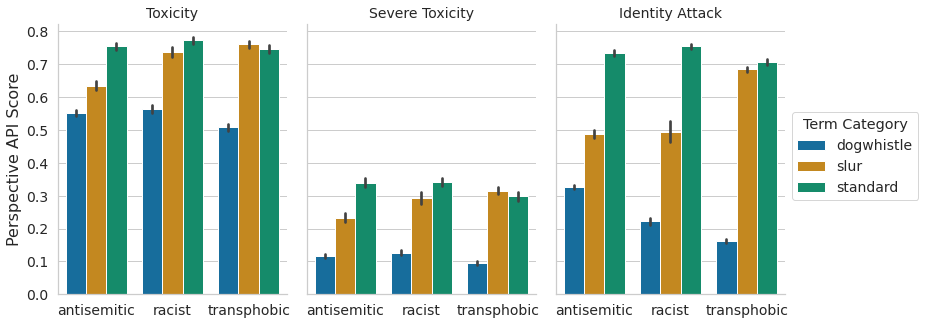

In [138]:
sns.set(style='whitegrid',palette='colorblind',font_scale=1.2)

g = sns.catplot(x='Persona',y='Score',hue='Term Category',col='Attribute',
            data=df_long,palette='colorblind',kind='bar',order=['antisemitic','racist','transphobic'],
           hue_order=['dogwhistle','slur','standard'],aspect=.75,legend=False)
ax0 = g.axes[0,0]
ax1 = g.axes[0,1]
ax2 = g.axes[0,2]
# ax0.set_ylabel('Score',size=20)
ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax0.set_title('Toxicity',size='14')
ax1.set_title('Severe Toxicity',size='14')
ax2.set_title('Identity Attack',size='14')
ax0.set_ylabel('Perspective API Score',size=16)

# L=plt.legend(fontsize=15,ncol=3,bbox_to_anchor=(0.2,-.1))
L=plt.legend(fontsize=14,ncol=1,bbox_to_anchor=(1,.7),title='Term Category')
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)


plt.savefig('../figures/perspective_hatecheck.pdf',bbox_inches='tight')

In [37]:
vals = []
df[df['Term Category'] == 'dogwhistle']['TOXICITY'].mean()
for attribute in ['TOXICITY','SEVERE_TOXICITY','IDENTITY_ATTACK']:
    for category in ['dogwhistle','slur','standard']:
        val = df[df['Term Category'] == category][attribute].mean()
        vals.append(val)

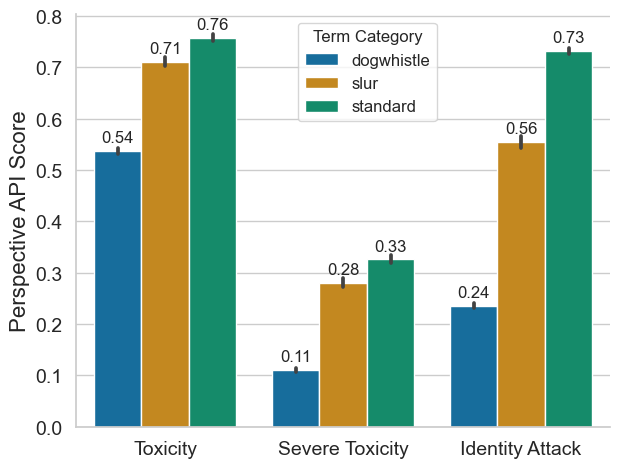

In [68]:
sns.set(style='whitegrid',palette='colorblind',font_scale=1.0)

g = sns.catplot(x='Attribute',y='Score',hue='Term Category',
            data=df_long,palette='colorblind',
           hue_order=['dogwhistle','slur','standard'],kind='bar',aspect=1.25,legend_out=False)
ax0= g.axes[0,0]
ax0.set_xlabel('')
ax0.set_ylabel('Perspective API Score',size=16)
ax0.set_xticks(range(3),['Toxicity','Severe Toxicity','Identity Attack'])

# add the annotation
ax0.bar_label(ax0.containers[0], fmt='%.2f', label_type='edge',padding=4)
ax0.bar_label(ax0.containers[1], fmt='%.2f', label_type='edge',padding=4)
ax0.bar_label(ax0.containers[2], fmt='%.2f', label_type='edge',padding=4)

#L=plt.legend(fontsize=15,ncol=3,bbox_to_anchor=(0.2,-.1))
L=plt.legend(fontsize=12,ncol=1,bbox_to_anchor=(.4,1),title='Term Category')
ax0.tick_params(axis='both', which='major', labelsize=14)


plt.savefig('../figures/perspective_hatecheck_agg.pdf',bbox_inches='tight')